#  Тестируем различные методы отбора признаков

Будем тестироваться на моделях на слабых объектах

In [3]:
import numpy as np
import pandas as pd

In [4]:
# тут можно полистывать, просто перечисление всех признаков, на которых поисходило обучение (даже в том же порядке)
f = {'not_j': {'sdssdr16+wise_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2'],
  'psdr2+wise_decals8tr': ['psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2'],
  'sdssdr16+all_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_g',
   'sdssdr16_r_cmodel-decals8tr_r',
   'sdssdr16_z_cmodel-decals8tr_z'],
  'psdr2+all_decals8tr': ['psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2'],
  'decals8tr': ['decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z'],
  'sdssdr16+psdr2+wise_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2'],
  'sdssdr16+psdr2+all_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_g',
   'sdssdr16_r_cmodel-decals8tr_r',
   'sdssdr16_z_cmodel-decals8tr_z']},
 'j': {'sdssdr16+wise_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'sdssdr16_u_psf-j',
   'sdssdr16_g_psf-j',
   'sdssdr16_r_psf-j',
   'sdssdr16_i_psf-j',
   'sdssdr16_z_psf-j',
   'sdssdr16_u_cmodel-j',
   'sdssdr16_i_cmodel-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'J'],
  'psdr2+wise_decals8tr': ['psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2',
   'psdr2_i_kron-j',
   'psdr2_y_kron-j',
   'psdr2_g_psf-j',
   'psdr2_r_psf-j',
   'psdr2_i_psf-j',
   'psdr2_z_psf-j',
   'psdr2_y_psf-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'J'],
  'sdssdr16+all_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_g',
   'sdssdr16_r_cmodel-decals8tr_r',
   'sdssdr16_z_cmodel-decals8tr_z',
   'sdssdr16_u_psf-j',
   'sdssdr16_g_psf-j',
   'sdssdr16_r_psf-j',
   'sdssdr16_i_psf-j',
   'sdssdr16_z_psf-j',
   'sdssdr16_u_cmodel-j',
   'sdssdr16_i_cmodel-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'decals8tr_g-j',
   'decals8tr_r-j',
   'decals8tr_z-j',
   'J'],
  'psdr2+all_decals8tr': ['psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2',
   'psdr2_i_kron-j',
   'psdr2_y_kron-j',
   'psdr2_g_psf-j',
   'psdr2_r_psf-j',
   'psdr2_i_psf-j',
   'psdr2_z_psf-j',
   'psdr2_y_psf-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'decals8tr_g-j',
   'decals8tr_r-j',
   'decals8tr_z-j',
   'J'],
  'decals8tr': ['decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'decals8tr_g-j',
   'decals8tr_r-j',
   'decals8tr_z-j',
   'J'],
  'sdssdr16+psdr2+wise_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2',
   'psdr2_i_kron-j',
   'psdr2_y_kron-j',
   'psdr2_g_psf-j',
   'psdr2_r_psf-j',
   'psdr2_i_psf-j',
   'psdr2_z_psf-j',
   'psdr2_y_psf-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'sdssdr16_u_psf-j',
   'sdssdr16_g_psf-j',
   'sdssdr16_r_psf-j',
   'sdssdr16_i_psf-j',
   'sdssdr16_z_psf-j',
   'sdssdr16_u_cmodel-j',
   'sdssdr16_i_cmodel-j',
   'J'],
  'sdssdr16+psdr2+all_decals8tr': ['sdssdr16_u_psf',
   'sdssdr16_g_psf',
   'sdssdr16_r_psf',
   'sdssdr16_i_psf',
   'sdssdr16_z_psf',
   'sdssdr16_u_cmodel',
   'sdssdr16_i_cmodel',
   'sdssdr16_u-g_psf',
   'sdssdr16_u-r_psf',
   'sdssdr16_u-i_psf',
   'sdssdr16_u-z_psf',
   'sdssdr16_u_psf-cmodel',
   'sdssdr16_g-i_psf',
   'sdssdr16_g_psf-cmodel',
   'sdssdr16_r-i_psf',
   'sdssdr16_i-z_psf',
   'sdssdr16_i_psf-cmodel',
   'psdr2_i_kron',
   'psdr2_y_kron',
   'psdr2_g_psf',
   'psdr2_r_psf',
   'psdr2_i_psf',
   'psdr2_z_psf',
   'psdr2_y_psf',
   'psdr2_g-i_psf',
   'psdr2_g-y_psf',
   'psdr2_r-i_psf',
   'psdr2_r-y_psf',
   'psdr2_i-z_psf',
   'psdr2_i-y_psf',
   'psdr2_i_psf-kron',
   'psdr2_z-y_psf',
   'psdr2_y_psf-kron',
   'decals8tr_Lw1-Lw2',
   'decals8tr_Lw1',
   'decals8tr_Lw2',
   'decals8tr_g',
   'decals8tr_r',
   'decals8tr_z',
   'decals8tr_g-r',
   'decals8tr_g-z',
   'decals8tr_r-z',
   'psdr2_g_kron-decals8tr_Lw1',
   'psdr2_g_kron-decals8tr_Lw2',
   'psdr2_r_kron-decals8tr_Lw1',
   'psdr2_r_kron-decals8tr_Lw2',
   'psdr2_i_kron-decals8tr_Lw1',
   'psdr2_i_kron-decals8tr_Lw2',
   'psdr2_z_kron-decals8tr_Lw1',
   'psdr2_z_kron-decals8tr_Lw2',
   'psdr2_y_kron-decals8tr_Lw1',
   'psdr2_y_kron-decals8tr_Lw2',
   'sdssdr16_u_cmodel-decals8tr_Lw1',
   'sdssdr16_u_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_Lw1',
   'sdssdr16_g_cmodel-decals8tr_Lw2',
   'sdssdr16_r_cmodel-decals8tr_Lw1',
   'sdssdr16_r_cmodel-decals8tr_Lw2',
   'sdssdr16_i_cmodel-decals8tr_Lw1',
   'sdssdr16_i_cmodel-decals8tr_Lw2',
   'sdssdr16_z_cmodel-decals8tr_Lw1',
   'sdssdr16_z_cmodel-decals8tr_Lw2',
   'sdssdr16_g_cmodel-decals8tr_g',
   'sdssdr16_r_cmodel-decals8tr_r',
   'sdssdr16_z_cmodel-decals8tr_z',
   'sdssdr16_u_psf-j',
   'sdssdr16_g_psf-j',
   'sdssdr16_r_psf-j',
   'sdssdr16_i_psf-j',
   'sdssdr16_z_psf-j',
   'sdssdr16_u_cmodel-j',
   'sdssdr16_i_cmodel-j',
   'decals8tr_g-j',
   'decals8tr_r-j',
   'decals8tr_z-j',
   'psdr2_i_kron-j',
   'psdr2_y_kron-j',
   'psdr2_g_psf-j',
   'psdr2_r_psf-j',
   'psdr2_i_psf-j',
   'psdr2_z_psf-j',
   'psdr2_y_psf-j',
   'decals8tr_Lw1-j',
   'decals8tr_Lw2-j',
   'J']}}

data = ['not_j', 'j'][0]

overview = "sdssdr16+psdr2+all_decals8tr"#f[data].keys():

In [238]:
df = pd.read_pickle('./data/3weak.pkl_gz', compression='gzip')
df1 = df.loc[df['fold'] == 0]#.dropna(subset=['J'])
df2 = df.loc[df['fold'] == 1]#.dropna(subset=['J'])

In [239]:
df11 = df1[f[data][overview]+['class']].dropna()
df22 = df2[f[data][overview]+['class']].dropna()

X1, y1 = df11[f[data][overview]].values, df11['class'].values #.replace({'class':classes}, inplace = True)
X2, y2 = df22[f[data][overview]].values, df22['class'].values

In [193]:
from sklearn.preprocessing import RobustScaler
import joblib
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import lightgbm as lgb
from time import time

In [240]:
model1, robust1 = joblib.load('3weak/models0/'+ data +'/model_'+overview+'.pkl'), joblib.load('3weak/models0/'+ data +'/'+overview+'_robust_for_gb.pkl')
model2, robust2 = joblib.load('3weak/models1/'+ data +'/model_'+overview+'.pkl'), joblib.load('3weak/models1/'+ data +'/'+overview+'_robust_for_gb.pkl')

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from hyperopt import hp

In [196]:
def data_preparation_bin(X, y, c=1000000, test_size = 0.2):
    from sklearn.model_selection import train_test_split
    X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==1], y[y==1], test_size=test_size, random_state = 43) if  len(y[y==1]) > 0 else ([], [], [], [])
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2], y[y==2], test_size=test_size, random_state = 43) if  len(y[y==2]) > 0 else ([], [], [], [])
    #X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3], y[y==3], test_size=test_size, random_state = 43) if  len(y[y==3]) > 0 else ([[]*X.shape[1]], [[]*X.shape[1]], [[]], [[]])
    
    count = c
    count1 = c

    X_train, X_test = np.concatenate((X1_train[:count], X2_train[:count])), np.concatenate((X1_test[:count1], X2_test[:count1]))
    y_train, y_test = np.concatenate((y1_train[:count], y2_train[:count])), np.concatenate((y1_test[:count1], y2_test[:count1]))

    data = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
    np.random.shuffle(data)

    datat = np.concatenate((X_test, y_test.reshape((len(y_test), 1))), axis=1)
    np.random.shuffle(datat)
    

    return data, datat

In [276]:
import lightgbm as lgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.model_selection import KFold

def scor(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

lgb_reg_params = {
    'min_child_samples':hp.randint('min_child_samples', 80)+1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
    'num_leaves' :      hp.randint('num_leaves', 100)+10,
    #'min_child_weight': hp.uniform('min_child_weight', 0.001, 0.99),
    'bagging_freq':     hp.randint('bagging_freq', 20),
    'n_estimators':     1000
}
lgb_fit_params = {
    'early_stopping_rounds': 20,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['score'] = lambda y, pred: -metrics.f1_score(y, pred)


rf_reg_params = {
    'min_samples_leaf': hp.randint('min_samples_leaf', 20)+1,
    'min_samples_split':hp.uniform('min_samples_split', 0.001, 0.1),
    #'max_features':     hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
    #'learning_rate':    hp.uniform('learning_rate', 0.001, 0.1),
    'n_estimators':     hp.randint('n_estimators', 800)+100
}
rf_fit_params = {
}
rf_para = dict()
rf_para['reg_params'] = rf_reg_params
rf_para['fit_params'] = rf_fit_params
rf_para['score'] = lambda y, pred: -metrics.f1_score(y, pred)

In [198]:
class HPOpt(object):

    def __init__(self, X, y, cv=3):
        self.X = X
        self.y = y
        self.cv = cv
        #print('init')

    def process(self, fn_name, space, trials, algo, max_evals):
        #print('in process')
        fn = getattr(self, fn_name)
        try:
            #print('try')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
            #print('i can')
        except Exception as e:
            print({'status': STATUS_FAIL,
                    'exception': str(e)})
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def rf_reg(self, para):
        reg = RandomForestClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMClassifier(**para['reg_params'])
        if self.cv>1:
            return self.train_cv_gb(reg, para)
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        if len(para['fit_params'])>0:
            #print('start')
            reg.fit(self.X, self.y,
                  eval_set=[(self.X, self.y), (self.X, self.y)],
                  **para['fit_params'])
        else:
            reg.fit(self.X, self.y)
        pred = reg.predict(self.X)
        loss = para['score'](self.y, pred)
        return {'loss': loss, 'status': STATUS_OK}


    def train_cv_gb(self, reg, para):
        kf = KFold(n_splits=self.cv, shuffle=False)
        loss = 0 
        for train, test in kf.split(self.X):
            #print('start', type(train[0]), type(test[0]), type(self.y[0]), type(self.X))
            if len(para['fit_params'])>0:
                reg = lgb.LGBMClassifier(**para['reg_params'])
                reg.fit(self.X[train], self.y[train],
                      eval_set=[(self.X[train], self.y[train]), (self.X[test], self.y[test])],
                      **para['fit_params'])
            else:
                reg.fit(self.X[train], self.y[train])
            #print('pred')
            pred = reg.predict(self.X[test])
            score = para['score'](self.y[test], pred)
            loss += score

        loss=loss/self.cv
        return {'loss': loss, 'status': STATUS_OK}

In [199]:
def create_path(path):
    import os
    try:
        os.makedirs(path)
    except FileExistsError:
        print("Директория %s уже существует" % path) 
    except OSError:
        print ("Создать директорию %s не удалось" % path)
        return 1
    return 0

In [200]:
def printt(*anyth):
    print(anyth, flush=True)

In [201]:
clr = ['skyblue', 'greenyellow','aquamarine', 'yellow', 'lime', 'springgreen',  'aqua',    'lightskyblue',  'red']

In [202]:
def print_feature(model, data, ax=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    final_importance = pd.DataFrame()
    final_importance['feature'] = data
    final_importance['importance'] = model.feature_importances_
    final_importance = final_importance.sort_values('importance', ascending=False)

    if ax is None:
        ax = plt.figure(figsize=(14,25))
    sns.barplot(x="importance",y="feature", ax=ax, data=final_importance)
    return final_importance['feature']
    #plt.tight_layout()

In [203]:
def show_top(a, b, count_top = 5, name=None):
    dtype = [('importance', int), ('number', int)]
    a = np.array([(a[i], i) for i in range(len(a))], dtype=dtype)
    b = np.array([(b[i], i) for i in range(len(b))], dtype=dtype)
    array1 = np.sort(a, order=['importance'])
    array2 = np.sort(b, order=['importance'])
    union = set(array1['number'][-count_top:]).union(set(array2['number'][-count_top:]))
    if name is None:
        return len(union), union
    else:
        return len(union), np.array(name)[list(union)]


In [204]:
def plot_top(a, b):
    dtype = [('importance', int), ('number', int)]
    a = np.array([(a[i], i) for i in range(len(a))], dtype=dtype)
    b = np.array([(b[i], i) for i in range(len(b))], dtype=dtype)
    array1 = np.sort(a, order=['importance'])['number']
    array2 = np.sort(b, order=['importance'])['number']
    #diff = set(array1['number'][-count_top:]) - set(array2['number'][-count_top:])
    plt.plot(np.arange(1, len(a)+1), 
             [count_top - len(set(array1[-count_top:]) - set(array2[-count_top:]))
                for count_top in np.arange(1, len(a)+1)])
    plt.xlabel('Count of top')
    plt.ylabel('Match')
    plt.tight_layout()
    plt.show()

In [205]:
def plot_top_col(array1, array2):
    #diff = set(array1['number'][-count_top:]) - set(array2['number'][-count_top:])
    plt.plot(np.arange(1, len(array1)+1), 
             [count_top - len(set(array1[-count_top:]) - set(array2[-count_top:]))
                for count_top in np.arange(1, len(array1)+1)])
    plt.xlabel('Count of top')
    plt.ylabel('Match')
    plt.tight_layout()
    plt.show()

In [206]:
len(f[data][overview])

65

## Встроенные методы LGBM

In [242]:
def add_print(model, features):
    feature_impgb=pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['GB','Feature'])
    plt.figure(figsize=(20, 10))
    sns.barplot(x="GB", y="Feature", data=feature_impgb.sort_values(by="GB", ascending=False).iloc[:50])
    plt.title('GB Most Important Features')
    
    plt.tight_layout()
    plt.show()

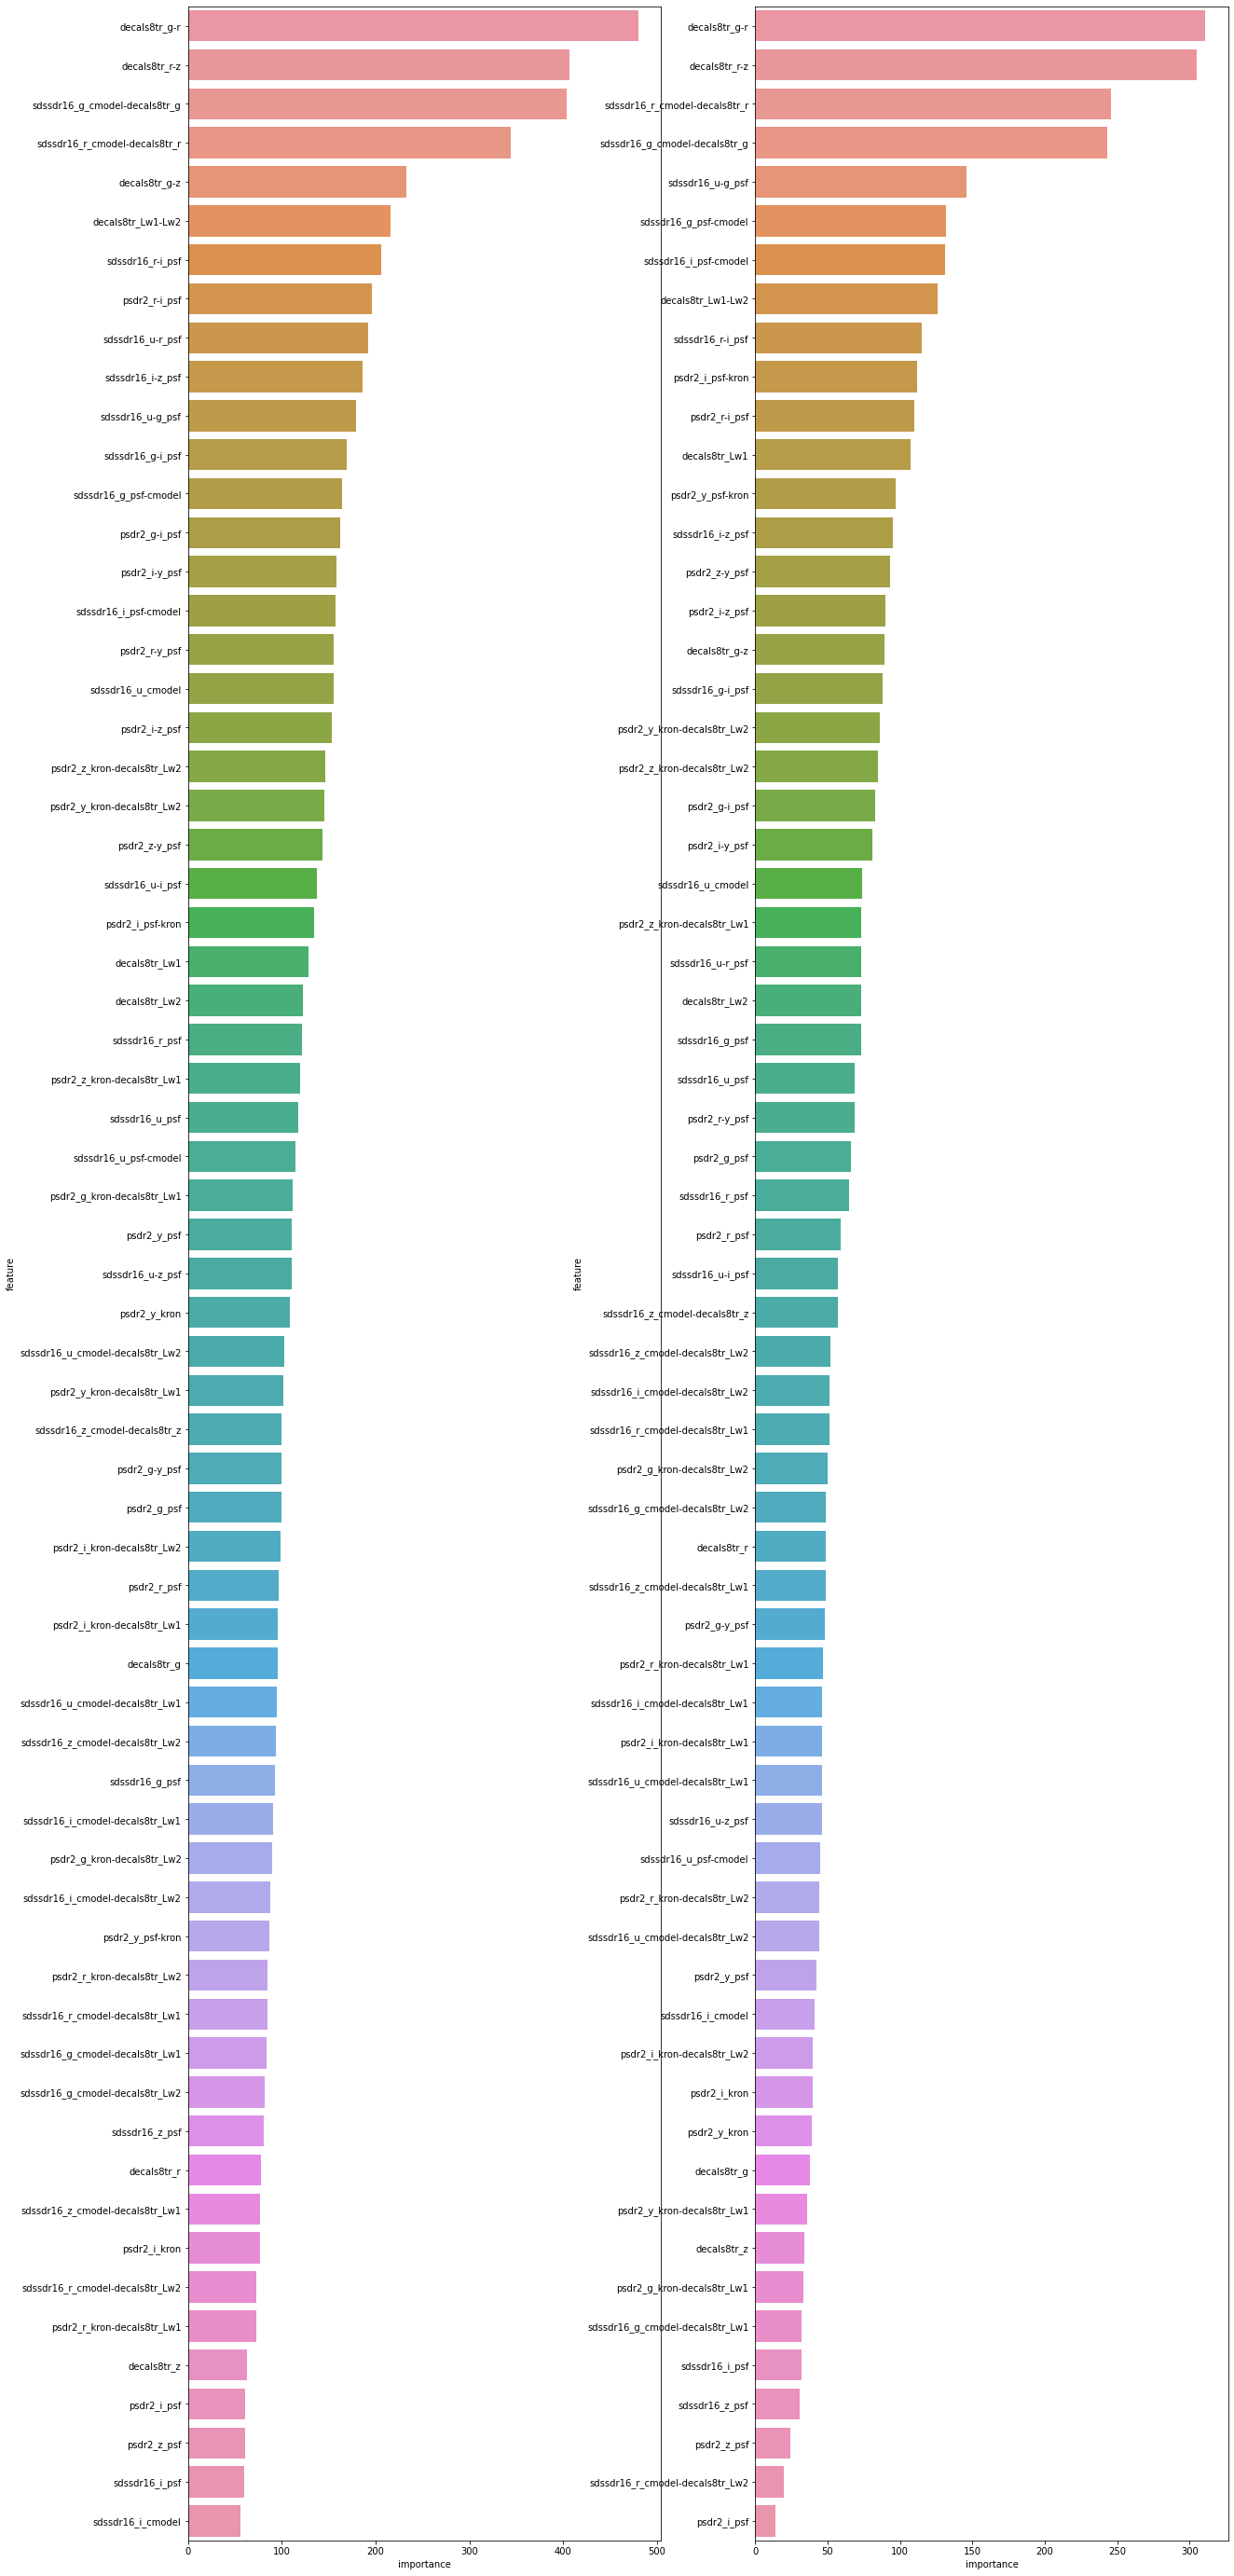

In [243]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 50))
fch1 = print_feature(model1, f[data][overview], ax1)
fch2 = print_feature(model2, f[data][overview], ax2)

In [244]:
fch1

39                    decals8tr_g-r
41                    decals8tr_r-z
62    sdssdr16_g_cmodel-decals8tr_g
63    sdssdr16_r_cmodel-decals8tr_r
40                    decals8tr_g-z
                  ...              
38                      decals8tr_z
21                      psdr2_i_psf
22                      psdr2_z_psf
3                    sdssdr16_i_psf
6                 sdssdr16_i_cmodel
Name: feature, Length: 65, dtype: object

In [278]:
def score(y, y_pred):
    from sklearn import metrics
    return metrics.f1_score(y, y_pred)

def fast_study(fitch, scores, scores_name, name='tmp'):
    acc = {}
    df_fold = {}
    gb_fold = {}
    for fold in [0, 1]:
        path = 'fast_study/' + str(name) + '/' + str(fold)
        if create_path(path):
            raise Exception('Некуда писать')

        df1 = df.loc[df['fold'] == fold].copy()
        df1 = df1[fitch + ['class']].dropna()
        print(len(fitch))

        X, y = df1[fitch], df1['class']
        data, datat = data_preparation_bin(X, y, test_size=0.2, c=500000)

        X1, y1 = data[:, :-1], data[:, -1].astype('int')
        X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
        robust = RobustScaler()

        X_train_norm = robust.fit_transform(X1)
        X_test_norm = robust.transform(X2)
        y_train = y1
        y_test = y2

        obj = HPOpt(X_train_norm, y_train, cv=3)
        lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=25)
        gb = lgb.LGBMClassifier(       
                                       **{'is_unbalance': True,
                                          'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                          'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                          #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                          'num_leaves': lgb_opt[0]['num_leaves']+10,
                                          'bagging_freq':lgb_opt[0]['bagging_freq'],
                                          'n_estimators': 10000
                                          })
        t = time()
        gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
        print('time', time()-t)
        print('best_iteration', gb.best_iteration_) #########################################################################
        df_fold[fold] = df1
        gb_fold[fold] = gb
        gb_test_acc = scores[0](y_test, gb.predict(X_test_norm))
        printt(gb_test_acc)
        joblib.dump(gb, path +'_model.pkl')
        joblib.dump(fitch, path +'_features.pkl')
        joblib.dump(robust, path + '_robust_for_gb.pkl')
        df_fold[fold] = df1
        gb_fold[fold] = gb
    
    for fold in [0, 1]:
        acc[fold] = []
        for score, score_name in zip(scores, scores_name):
            acc[fold] += [score(df_fold[(fold + 1) % 2]['class'], 
                                gb_fold[fold].predict(df_fold[(fold + 1) % 2][fitch]) if score_name != 'ROC-AUC'\
                                else gb_fold[fold].predict_proba(df_fold[(fold + 1) % 2][fitch])[:, 1])]
        
    return gb_fold, acc, df_fold, 'fast_study/' + str(name) + '/'

In [275]:
from sklearn import metrics
def get_acc_fast(fitchs, file_name='tmp', scores=[metrics.f1_score] , scores_name=['F1']):
    ftch = list(fitchs)
    len1 = []
    len2 = []
    ac = []
    x = []
    plt.figure(figsize=(10, 10))
    
    for i in range(4, min(len(fitchs), 70), 5):
        _, acc, _, _ = fast_study(ftch[:i+1], scores, scores_name)
        len1.append(acc[0])
        len2.append(acc[1])
        ac.append(list((np.array(acc[1]) + np.array(acc[0])) / 2))
        x.append(i+1)
        
    lines = []
    len1 = np.array(len1)
    len2 = np.array(len2)
    ac = np.array(ac)
    j = 0
    for i, score_name in enumerate(scores_name):
        lines += [plt.plot(x, len1[:, i], color=clr[j], lw=2, label=score_name + 'fold 0')[0], 
                 plt.plot(x, len2[:, i], color=clr[j], lw=2, label=score_name + 'fold 1')[0],
                 plt.plot(x, ac[:, i], color=clr[j], lw=2, linestyle='--', label=score_name + 'mean')[0]]
        j += 1
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlabel('numder fitchs')
    #plt.xlim(0.1, 4)
    plt.ylim(0.0, 1.01)
    plt.ylabel('Score')
    plt.title('Top')
    plt.grid(True)
    plt.legend(lines, loc=(0, -0.4), prop=dict(size=14))
    plt.savefig(file_name+'_top.png')
    plt.show()
    

Директория fast_study/tmp/0 уже существует
5
100%|██████████| 25/25 [00:31<00:00,  1.26s/trial, best loss: -0.9086937107640094]
time 0.43497753143310547
best_iteration 90
(0.9114900527811612,)
Директория fast_study/tmp/1 уже существует
5
100%|██████████| 25/25 [00:30<00:00,  1.22s/trial, best loss: -0.9073609758604627]
time 0.4057774543762207
best_iteration 116
(0.9061705804615229,)
Директория fast_study/tmp/0 уже существует
10
100%|██████████| 25/25 [00:38<00:00,  1.53s/trial, best loss: -0.938130207001106]
time 0.6808531284332275
best_iteration 247
(0.9469397532638639,)
Директория fast_study/tmp/1 уже существует
10
100%|██████████| 25/25 [00:40<00:00,  1.60s/trial, best loss: -0.9395027653500078]
time 0.5956435203552246
best_iteration 372
(0.9380002389200811,)
Директория fast_study/tmp/0 уже существует
15
100%|██████████| 25/25 [00:49<00:00,  1.98s/trial, best loss: -0.944096136023289] 
time 0.7322800159454346
best_iteration 303
(0.9475453126875526,)
Директория fast_study/tmp/1 уже с

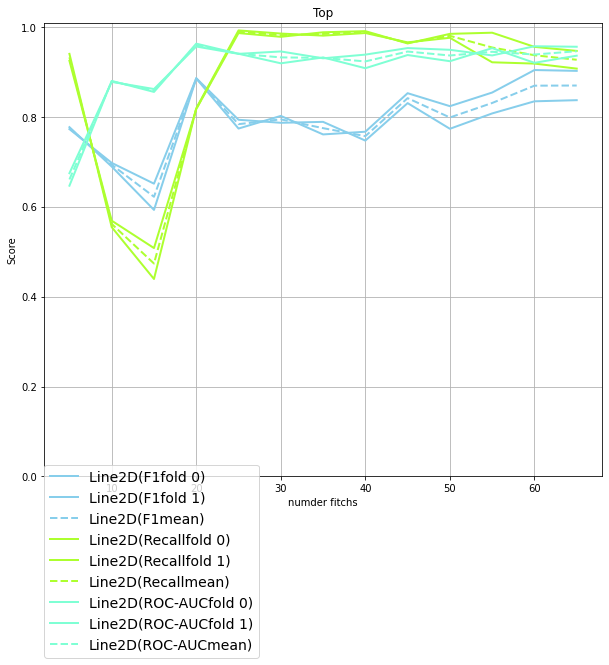

In [279]:
get_acc_fast(fch1.values, 'lgbm', scores=[metrics.f1_score, metrics.recall_score, metrics.roc_auc_score], scores_name=['F1', 'Recall', 'ROC-AUC'])

Директория fast_study/tmp/0 уже существует
5
100%|██████████| 25/25 [00:33<00:00,  1.34s/trial, best loss: -0.9179882166808347]
time 0.4888184070587158
best_iteration 204
(0.9210073834327904,)
Директория fast_study/tmp/1 уже существует
5
100%|██████████| 25/25 [00:33<00:00,  1.35s/trial, best loss: -0.9159488700082862]
time 0.4877626895904541
best_iteration 127
(0.9109672197490895,)
Директория fast_study/tmp/0 уже существует
10
100%|██████████| 25/25 [00:38<00:00,  1.55s/trial, best loss: -0.9392928519479119]
time 0.6116485595703125
best_iteration 117
(0.9399208538194028,)
Директория fast_study/tmp/1 уже существует
10
100%|██████████| 25/25 [00:41<00:00,  1.68s/trial, best loss: -0.9401267166591634]
time 0.5291473865509033
best_iteration 259
(0.935692087018886,)
Директория fast_study/tmp/0 уже существует
15
100%|██████████| 25/25 [00:54<00:00,  2.18s/trial, best loss: -0.9712556753642287]
time 0.7018578052520752
best_iteration 234
(0.9733638664577557,)
Директория fast_study/tmp/1 уже с

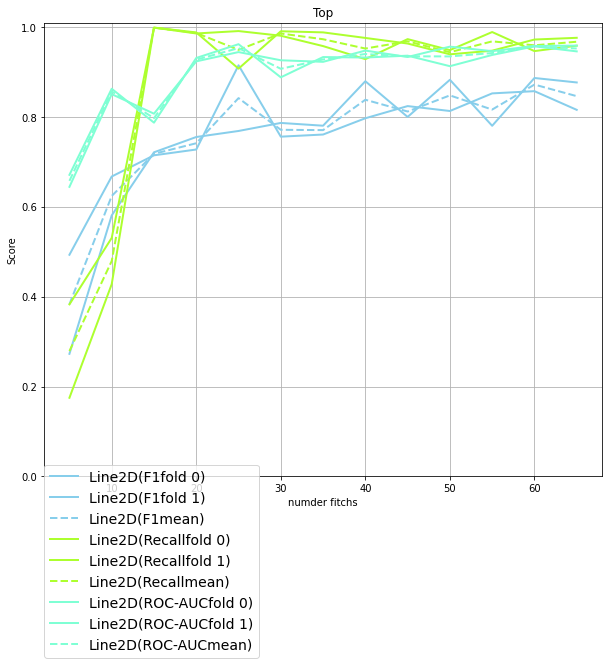

In [280]:
get_acc_fast(fch2.values, 'lgbm', scores=[metrics.f1_score, metrics.recall_score, metrics.roc_auc_score], scores_name=['F1', 'Recall', 'ROC-AUC'])

Не сильный разброс, но не точное совпадение

In [99]:
show_top(model1.feature_importances_, model2.feature_importances_, name=f[data][overview])

(6, array(['decals8tr_g-r', 'sdssdr16_u-g_psf', 'decals8tr_r-z',
        'sdssdr16_r-i_psf', 'sdssdr16_g_cmodel-decals8tr_g',
        'sdssdr16_r_cmodel-decals8tr_r'], dtype='<U31'))

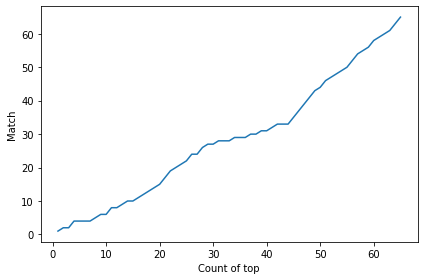

In [212]:
plot_top(model1.feature_importances_, model2.feature_importances_)

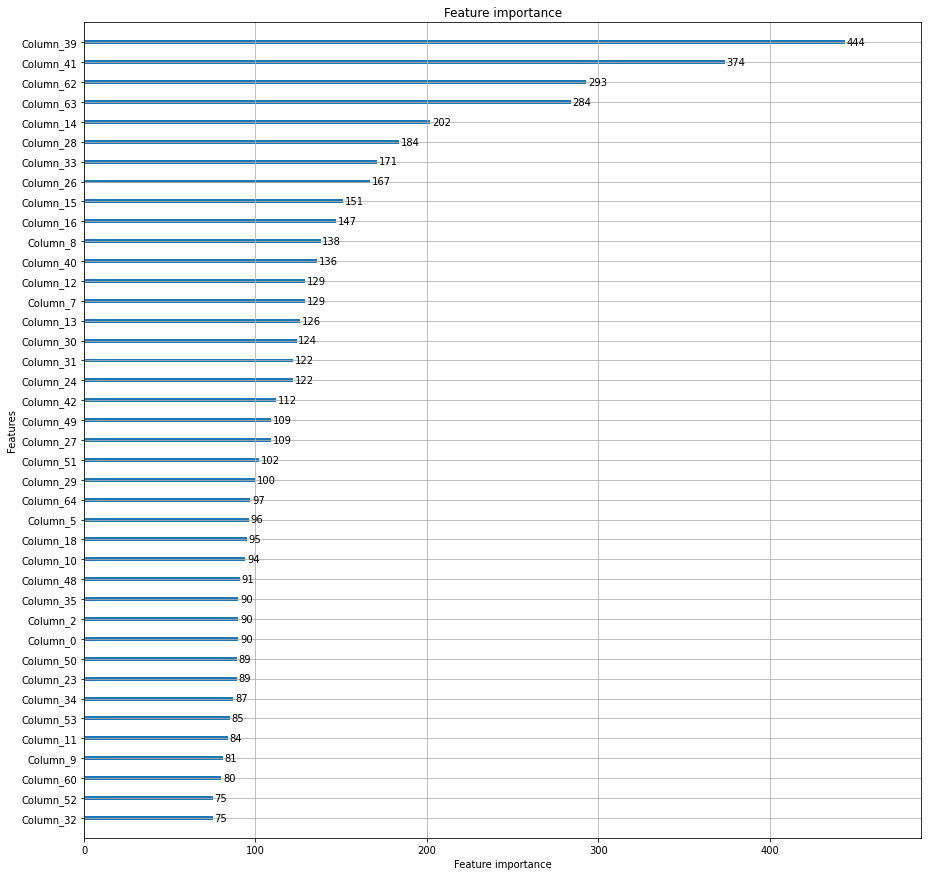

In [74]:
lgb.plot_importance(model1, max_num_features=40, figsize=(15,15))

In [ ]:
def quality_of_selection()

## SHAP

In [57]:
#!pip install shap

In [262]:
import shap
from sklearn.model_selection import train_test_split
explainer = shap.TreeExplainer(model1)
X_train = robust1.transform(df1[f[data][overview]])
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(2, 41952, 65)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [263]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_train[0, :])

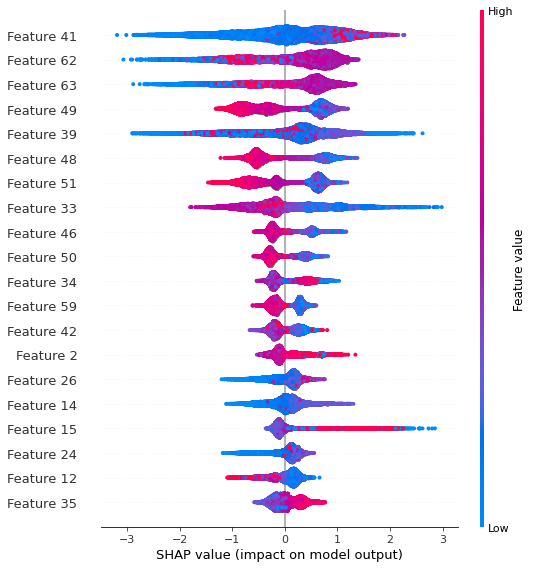

In [264]:
shap.summary_plot(shap_values[0], X_train)

In [265]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    model1.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)


False

In [266]:
model1.predict_proba(X_train)

array([[9.99644899e-01, 3.55101095e-04],
       [9.92840969e-01, 7.15903139e-03],
       [9.99366177e-01, 6.33822942e-04],
       ...,
       [7.59610487e-01, 2.40389513e-01],
       [9.99760555e-01, 2.39445439e-04],
       [9.99815464e-01, 1.84535677e-04]])

In [267]:
shap_values.sum() + explainer.expected_value 

array([ 0.7389832, -0.7389832])

In [268]:
np.abs(shap_values).shape

(2, 41952, 65)

In [269]:
vals = np.abs(shap_values[0]).mean(0)
feature_names = f[data][overview]

feature_importance1 = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
feature_importance1.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
feature_importance1.head()

,col_name,feature_importance_vals
41,decals8tr_r-z,0.725248
62,sdssdr16_g_cmodel-decals8tr_g,0.688079
63,sdssdr16_r_cmodel-decals8tr_r,0.661391
49,psdr2_z_kron-decals8tr_Lw2,0.633752
39,decals8tr_g-r,0.622028


In [270]:
explainer = shap.TreeExplainer(model2)
X_train = robust1.transform(df2[f[data][overview]])
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(2, 42146, 65)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [271]:
vals = np.abs(shap_values[0]).mean(0)
feature_names = f[data][overview]

feature_importance2 = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
feature_importance2.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
feature_importance2.head()

,col_name,feature_importance_vals
41,decals8tr_r-z,0.750037
62,sdssdr16_g_cmodel-decals8tr_g,0.743042
51,psdr2_y_kron-decals8tr_Lw2,0.645069
48,psdr2_z_kron-decals8tr_Lw1,0.641848
63,sdssdr16_r_cmodel-decals8tr_r,0.594658


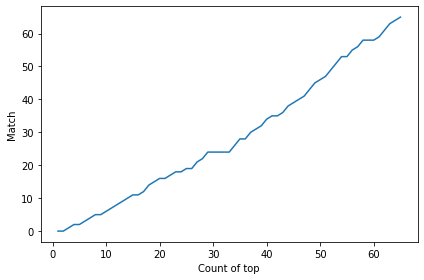

In [272]:
plot_top_col(feature_importance1.col_name, feature_importance2.col_name)

Директория fast_study/tmp/0 уже существует
5
100%|██████████| 25/25 [00:30<00:00,  1.21s/trial, best loss: -0.9515616713337586]
time 0.2809019088745117
best_iteration 110
(0.9488394701664843,)
Директория fast_study/tmp/1 уже существует
5
100%|██████████| 25/25 [00:29<00:00,  1.19s/trial, best loss: -0.949056155813933] 
time 0.3039209842681885
best_iteration 165
(0.9483839845634346,)
Директория fast_study/tmp/0 уже существует
10
100%|██████████| 25/25 [00:32<00:00,  1.30s/trial, best loss: -0.9635338874714922]
time 0.35334157943725586
best_iteration 127
(0.9658171276724242,)
Директория fast_study/tmp/1 уже существует
10
100%|██████████| 25/25 [00:30<00:00,  1.20s/trial, best loss: -0.9623099774656731]
time 0.5932357311248779
best_iteration 108
(0.9593338964643419,)
Директория fast_study/tmp/0 уже существует
15
100%|██████████| 25/25 [00:37<00:00,  1.50s/trial, best loss: -0.969760244372032]
time 0.587327241897583
best_iteration 240
(0.9741555475417718,)
Директория fast_study/tmp/1 уже с

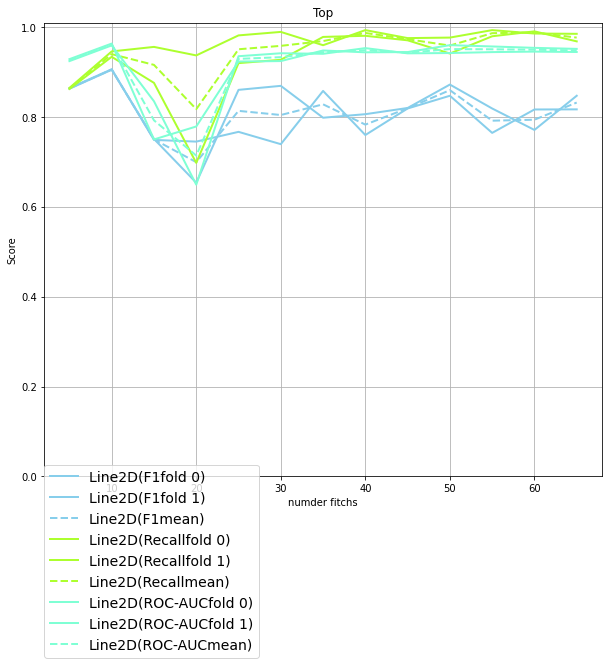

In [281]:
get_acc_fast(feature_importance1.col_name.values, 'shap', 
             scores=[metrics.f1_score, metrics.recall_score, metrics.roc_auc_score], 
             scores_name=['F1', 'Recall', 'ROC-AUC'])
#get_acc_fast(feature_importance1.col_name.values, 'shap')

Директория fast_study/tmp/0 уже существует
5
100%|██████████| 25/25 [00:21<00:00,  1.16trial/s, best loss: -0.9402522331489124]
time 0.3079075813293457
best_iteration 92
(0.9421810197609173,)
Директория fast_study/tmp/1 уже существует
5
100%|██████████| 25/25 [00:20<00:00,  1.23trial/s, best loss: -0.9403409029031554]
time 0.37435173988342285
best_iteration 290
(0.9359317904993911,)
Директория fast_study/tmp/0 уже существует
10
100%|██████████| 25/25 [00:36<00:00,  1.44s/trial, best loss: -0.971709294100315]
time 0.4303619861602783
best_iteration 115
(0.9698649951783993,)
Директория fast_study/tmp/1 уже существует
10
100%|██████████| 25/25 [00:34<00:00,  1.36s/trial, best loss: -0.9712189060028567]
time 0.5179123878479004
best_iteration 99
(0.9691439548565255,)
Директория fast_study/tmp/0 уже существует
15
100%|██████████| 25/25 [00:35<00:00,  1.40s/trial, best loss: -0.9720051058300155]
time 0.43999814987182617
best_iteration 155
(0.9735794426348172,)
Директория fast_study/tmp/1 уже с

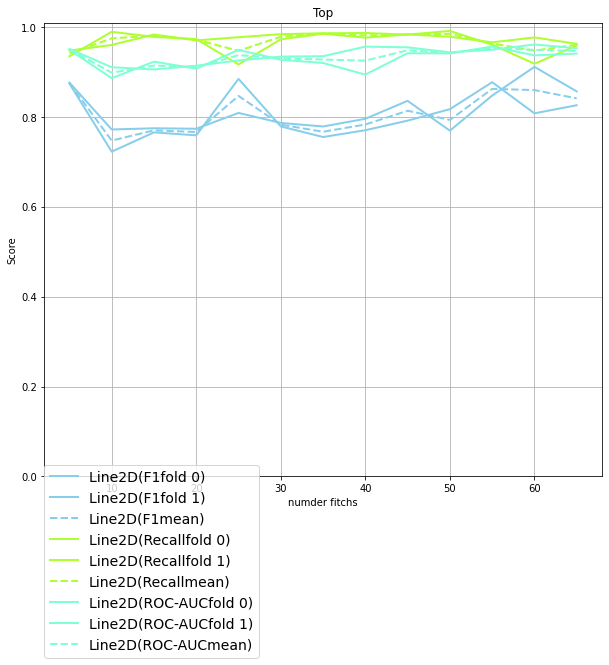

In [282]:
get_acc_fast(feature_importance2.col_name.values, 'shap', 
             scores=[metrics.f1_score, metrics.recall_score, metrics.roc_auc_score], 
             scores_name=['F1', 'Recall', 'ROC-AUC'])
#get_acc_fast(feature_importance1.col_name.values, 'shap')

In [187]:
feature_importance1.col_name.values[:10]

array(['decals8tr_r-z', 'sdssdr16_g_cmodel-decals8tr_g',
       'sdssdr16_r_cmodel-decals8tr_r', 'psdr2_z_kron-decals8tr_Lw2',
       'decals8tr_g-r', 'psdr2_z_kron-decals8tr_Lw1',
       'psdr2_y_kron-decals8tr_Lw2', 'decals8tr_Lw1-Lw2',
       'psdr2_i_kron-decals8tr_Lw1', 'psdr2_y_kron-decals8tr_Lw1'],
      dtype=object)

In [149]:
feature_importance1.col_name.values[:10]

array(['sdssdr16_g_cmodel-decals8tr_g', 'decals8tr_g-r', 'decals8tr_r-z',
       'sdssdr16_r_cmodel-decals8tr_r', 'psdr2_z_kron-decals8tr_Lw2',
       'psdr2_y_kron-decals8tr_Lw2', 'decals8tr_Lw1-Lw2',
       'psdr2_z_kron-decals8tr_Lw1', 'psdr2_i_kron-decals8tr_Lw1',
       'sdssdr16_r-i_psf'], dtype=object)

In [189]:
feature_importance2.col_name.values[:8]

array(['decals8tr_r-z', 'sdssdr16_g_cmodel-decals8tr_g',
       'psdr2_y_kron-decals8tr_Lw2', 'psdr2_z_kron-decals8tr_Lw1',
       'sdssdr16_r_cmodel-decals8tr_r', 'decals8tr_g-r',
       'psdr2_z_kron-decals8tr_Lw2', 'decals8tr_Lw1'], dtype=object)

In [188]:
set(['decals8tr_r-z', 'sdssdr16_g_cmodel-decals8tr_g',
       'sdssdr16_r_cmodel-decals8tr_r', 'psdr2_z_kron-decals8tr_Lw2',
       'decals8tr_g-r', 'psdr2_z_kron-decals8tr_Lw1',
       'psdr2_y_kron-decals8tr_Lw2', 'decals8tr_Lw1-Lw2',
       'psdr2_i_kron-decals8tr_Lw1', 'psdr2_y_kron-decals8tr_Lw1']) - set(['sdssdr16_g_cmodel-decals8tr_g', 'decals8tr_g-r', 'decals8tr_r-z',
       'sdssdr16_r_cmodel-decals8tr_r', 'psdr2_z_kron-decals8tr_Lw2',
       'psdr2_y_kron-decals8tr_Lw2', 'decals8tr_Lw1-Lw2',
       'psdr2_z_kron-decals8tr_Lw1', 'psdr2_i_kron-decals8tr_Lw1',
       'sdssdr16_r-i_psf'])

{'psdr2_y_kron-decals8tr_Lw1'}